c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Mean Absolute Error =  55.698326986164496


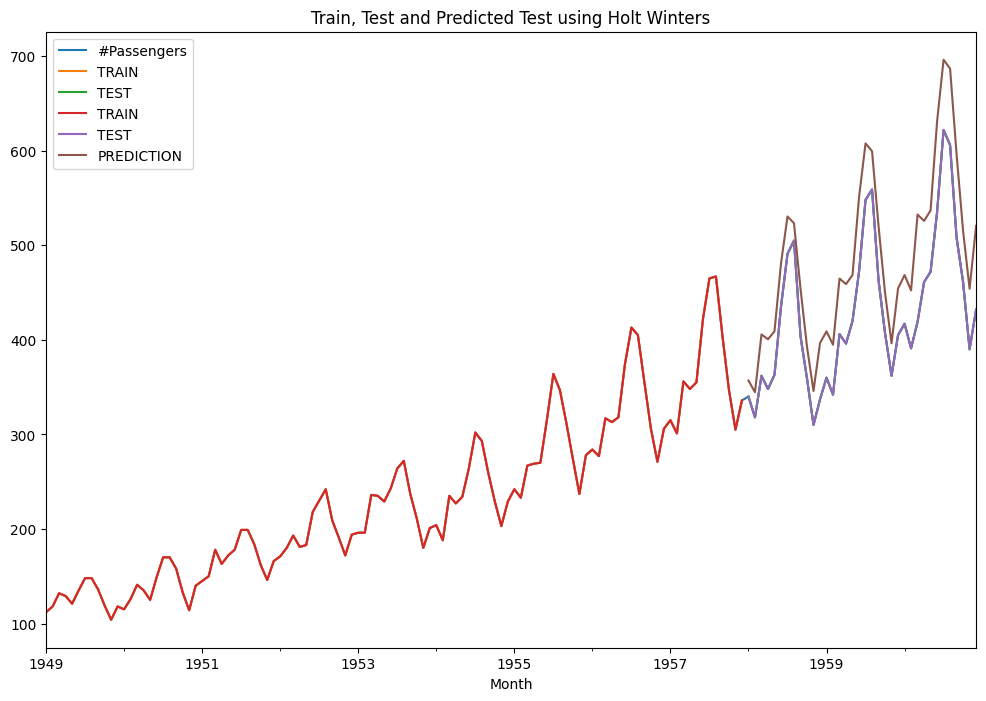

In [4]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,mean_squared_error
import pandas as pd

airline  = pd.read_csv('AirPassengers.csv',index_col='Month',parse_dates=True)
airline.plot()
airline.freq = 'MS'
airline.index
len(airline)

train_airline = airline[:108] 
test_airline = airline[108:] 
fitted_model = ExponentialSmoothing(train_airline['#Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(36).rename('HW Test Forecast')

test_predictions[:10]
train_airline['#Passengers'].plot(legend=True,label='TRAIN')
test_airline['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
plt.title('Train and Test Data');

train_airline['#Passengers'].plot(legend=True,label='TRAIN')
test_airline['#Passengers'].plot(legend=True,label='TEST',figsize=(12,8))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters');
print("Mean Absolute Error = ",mean_absolute_error(test_airline,test_predictions))


c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Program Files\Python311\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


Text(0.5, 1.0, 'Airline Passenger Forecast')

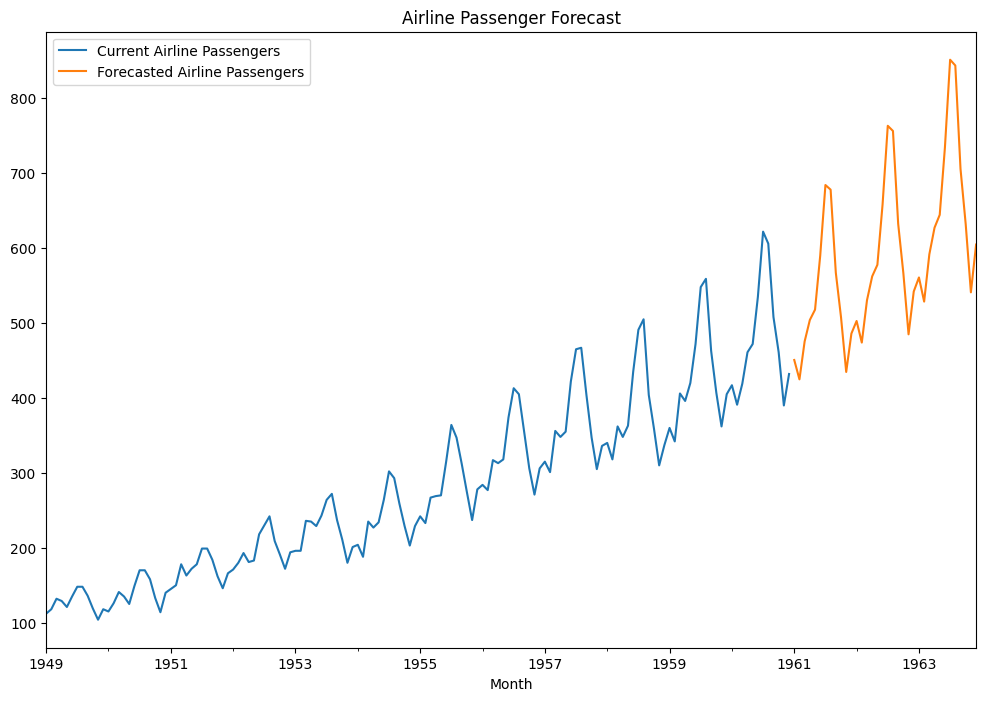

In [5]:
final_model = ExponentialSmoothing(airline['#Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
forecast_predictions = final_model.forecast(steps=36)

airline['#Passengers'].plot(figsize=(12,8),legend=True,label='Current Airline Passengers')
forecast_predictions.plot(legend=True,label='Forecasted Airline Passengers')
plt.title('Airline Passenger Forecast')